# __Pipeline 3, Pt 2__
## _Min Max --> Normalization --> 3 STD_

### __Import Data__

In [1]:
# import required package for data handling
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from pandas import DataFrame
%matplotlib inline

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

from scipy.stats import boxcox
from scipy import stats

In [2]:
data_cat_enc = pd.read_csv('data_cat_enc.csv')

In [3]:
data_cont = pd.read_csv('data_cont.csv')

In [4]:
target_values = pd.read_csv('target_values.csv')

### __Min Max__

In [5]:
# use MinMaxScaler to transform the data to fit
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
data_cont = scaler.fit_transform(data_cont)

# rename the df to make it easier to continue with normalization 
data_cont_transform = pd.DataFrame(data_cont)

In [6]:
data_cont_transform.columns=['Administrative','Administrative_Duration','Informational','Informational_Duration', 
                             'ProductRelated', 'ProductRelated_Duration', 'BounceRates',
                             'ExitRates', 'PageValues']

In [7]:
# confirm all the data is between 0 and 1 (min and max)
data_cont_transform.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,0.085747,0.023779,0.020982,0.013522,0.045009,0.018676,0.110957,0.215364,0.016279
std,0.123029,0.052013,0.052923,0.055209,0.063086,0.029913,0.242442,0.242983,0.051328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.009929,0.002878,0.000000,0.071429,0.000000
50%,0.037037,0.002207,0.000000,0.000000,0.025532,0.009362,0.015562,0.125782,0.000000
75%,0.148148,0.027438,0.000000,0.000000,0.053901,0.022887,0.084063,0.250000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


__Boxplot:__

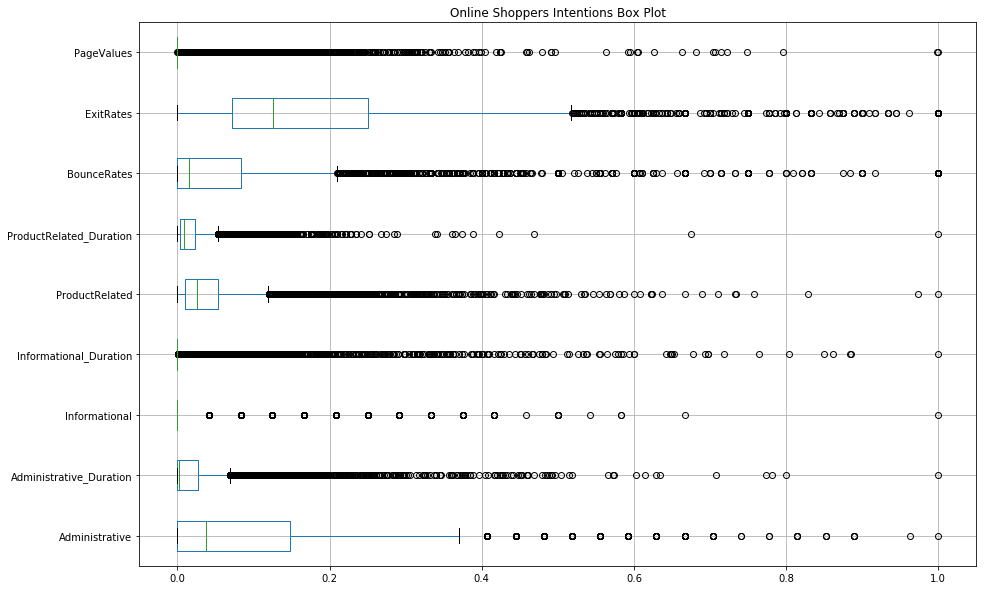

In [8]:
data_cont_transform.boxplot(vert=False, figsize=(15,10))
plt.title('Online Shoppers Intentions Box Plot')
plt.show()

### __Normalization__

__Convert:__

*Positively Skewed*: square root, cube root, log, 1/x

*Negatively Skewed*: square, cubic, exponential

- Scipy Features:
   - Yeojohnson & boxcox are used to normalize the data
   - To use boxcox, all numbers in the column must be positive, if not, use stats.yeojohnson
   - Note: add [0] to output 1 column without adding the lambda column
   - After using Yeojohnson or boxcox, confirm the skewness through .skew().
       - If any values are not between -0.5 and 0.5, use the conversions above to complete the normalization

In [9]:
data_cont_transform.skew()

Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
dtype: float64

In [10]:
data_cont_transform["AdministrativeSkew"]= stats.yeojohnson(data_cont_transform["Administrative"])[0]

In [11]:
data_cont_transform["Administrative_DurationSkew"]= stats.yeojohnson(data_cont_transform["Administrative_Duration"])[0]

In [12]:
data_cont_transform["InformationalSkew"]= stats.yeojohnson(data_cont_transform["Informational"])[0]

In [13]:
data_cont_transform["Informational_DurationSkew"]= stats.yeojohnson(data_cont_transform["Informational_Duration"])[0]

In [14]:
data_cont_transform["ProductRelatedSkew"]= stats.yeojohnson(data_cont_transform["ProductRelated"])[0]

In [15]:
data_cont_transform["ProductRelated_DurationSkew"]= stats.yeojohnson(data_cont_transform["ProductRelated_Duration"])[0]

In [16]:
data_cont_transform["BounceRatesSkew"]= stats.yeojohnson(data_cont_transform["BounceRates"])[0]

In [17]:
data_cont_transform["ExitRatesSkew"]= stats.yeojohnson(data_cont_transform["ExitRates"])[0]

In [18]:
data_cont_transform["PageValuesSkew"]= stats.yeojohnson(data_cont_transform["PageValues"])[0]

In [19]:
data_cont_norm = data_cont_transform.drop(['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues'], axis=1)

In [20]:
data_cont_norm.skew()

AdministrativeSkew             0.478688
Administrative_DurationSkew    0.782543
InformationalSkew              1.430181
Informational_DurationSkew     1.958921
ProductRelatedSkew             0.452009
ProductRelated_DurationSkew    0.514425
BounceRatesSkew                0.918443
ExitRatesSkew                  0.337945
PageValuesSkew                 1.619249
dtype: float64

In [21]:
data_cont_norm['BounceRatesSkew'] = data_cont_norm['BounceRatesSkew'].apply(np.sqrt)

In [22]:
data_cont_norm['ProductRelated_DurationSkew'] = data_cont_norm['ProductRelated_DurationSkew'].apply(np.sqrt)

In [23]:
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)
data_cont_norm['Informational_DurationSkew'] = data_cont_norm['Informational_DurationSkew'].apply(np.sqrt)

In [24]:
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)
data_cont_norm['InformationalSkew'] = data_cont_norm['InformationalSkew'].apply(np.sqrt)

In [25]:
data_cont_norm['Administrative_DurationSkew'] = data_cont_norm['Administrative_DurationSkew'].apply(np.sqrt)

In [26]:
data_cont_norm.skew()

AdministrativeSkew             0.478688
Administrative_DurationSkew    0.329580
InformationalSkew              1.399379
Informational_DurationSkew     1.539389
ProductRelatedSkew             0.452009
ProductRelated_DurationSkew   -0.235439
BounceRatesSkew                0.326226
ExitRatesSkew                  0.337945
PageValuesSkew                 1.619249
dtype: float64

- InformationalSkew, Informational_DurationSkew, and PageValuesSkew are highly skewed because of the distribution of its values.
- The majority of the values are 0, making it very hard to correct the skewness; yeojohnson did not skew them to between -0.5 and 0.5.
- Doing it by hand after yeojohnson did not correct the skewness much more either.

__Visualize:__

After normalizing, visualize the results in histograms and compare them to the previous histograms.

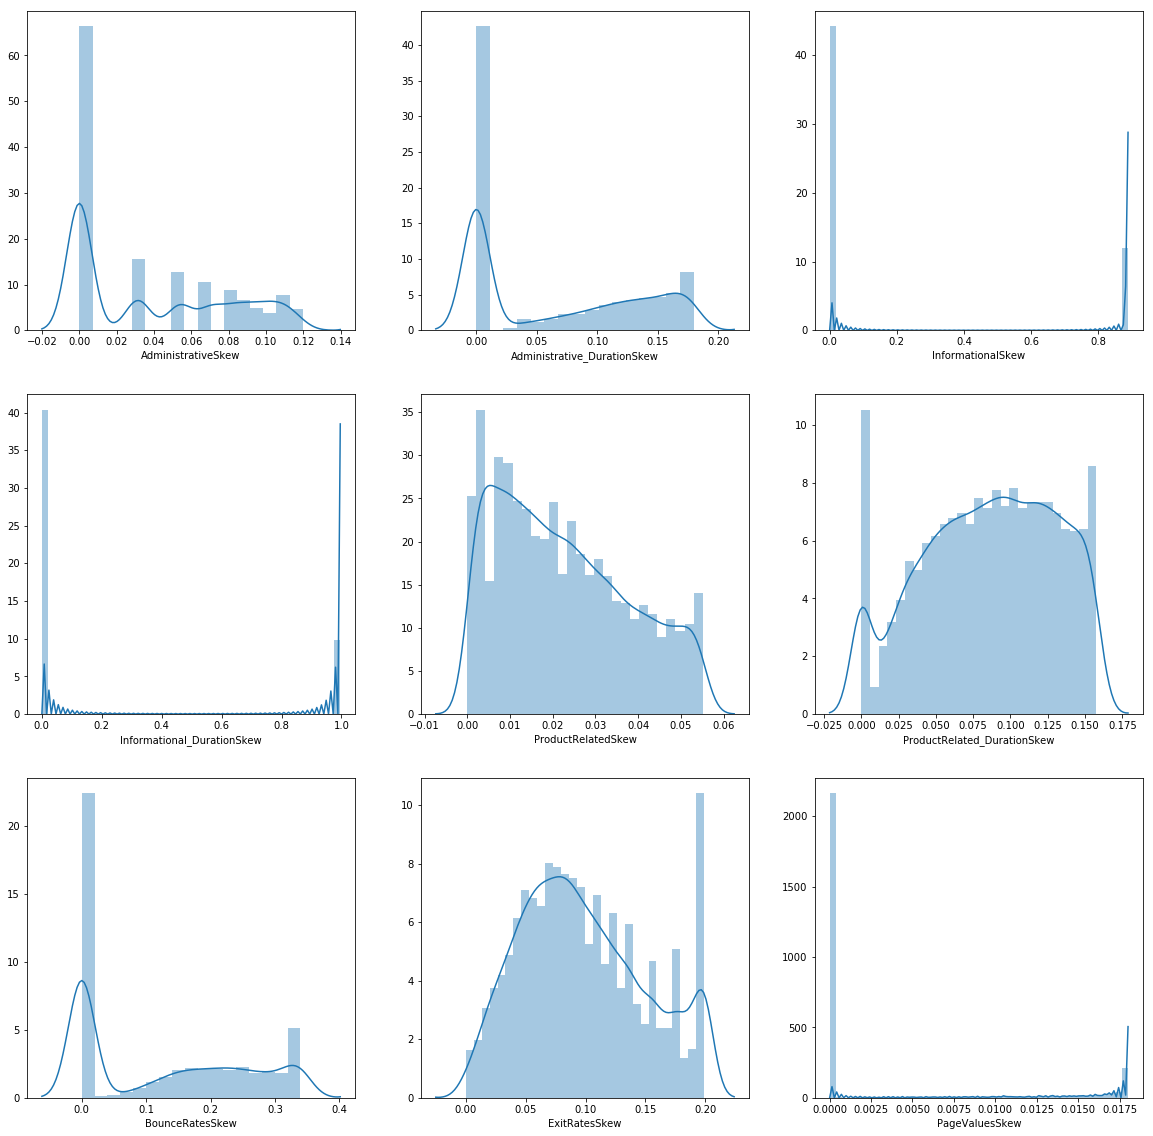

In [27]:
f, axes = plt.subplots(3, 3, figsize=(20,20), sharex=False)
sns.distplot(data_cont_norm["AdministrativeSkew"] , ax=axes[0, 0])
sns.distplot(data_cont_norm["Administrative_DurationSkew"] , ax=axes[0, 1])
sns.distplot(data_cont_norm["InformationalSkew"] , ax=axes[0, 2])
sns.distplot(data_cont_norm["Informational_DurationSkew"] , ax=axes[1, 0])
sns.distplot(data_cont_norm["ProductRelatedSkew"] , ax=axes[1, 1])
sns.distplot(data_cont_norm["ProductRelated_DurationSkew"] , ax=axes[1, 2])
sns.distplot(data_cont_norm["BounceRatesSkew"] , ax=axes[2, 0])
sns.distplot(data_cont_norm["ExitRatesSkew"] , ax=axes[2, 1])
sns.distplot(data_cont_norm["PageValuesSkew"] , ax=axes[2, 2])
plt.show()

## __3 STD__

__Set the Upper Bound to 3 Standard Deviations Above the Mean:__

In [28]:
for col in data_cont_norm.columns:
    u_bound = data_cont_norm[col].mean() + 3* data_cont_norm[col].std()
    data_cont_norm[col][data_cont_norm[col] > u_bound] = u_bound

__Set the Lower Bound to 3 Standard Deviations Below the Mean:__

In [29]:
for col in data_cont_norm.columns:
    l_bound = data_cont_norm[col].mean() - 3*data_cont_norm[col].std()
    data_cont_norm[col][data_cont_norm[col] < l_bound] = l_bound

__Boxplot:__

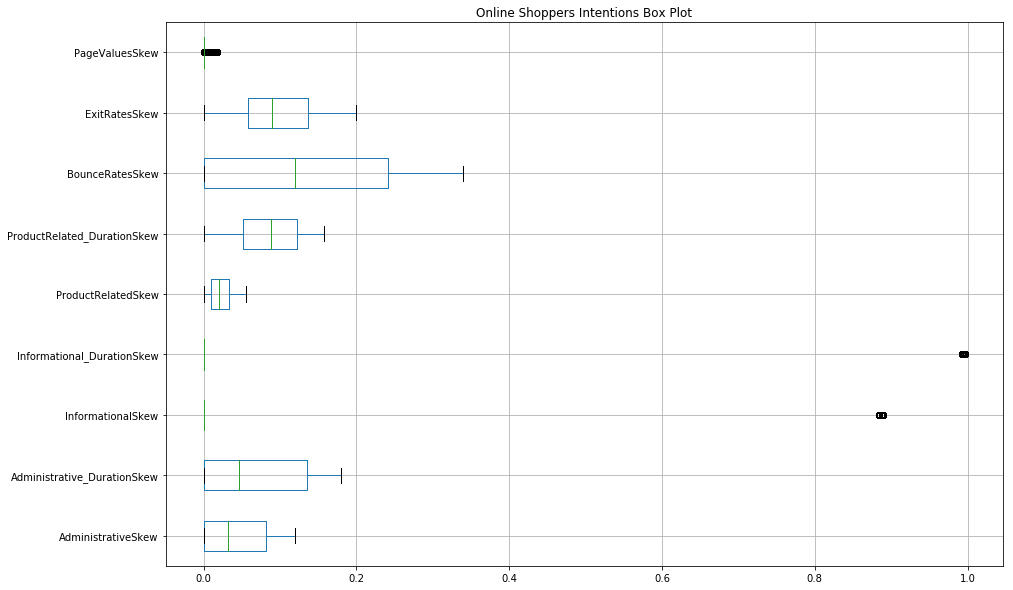

In [30]:
data_cont_norm.boxplot(vert=False, figsize=(15,10))
plt.title('Online Shoppers Intentions Box Plot')
plt.show()

## Correlation

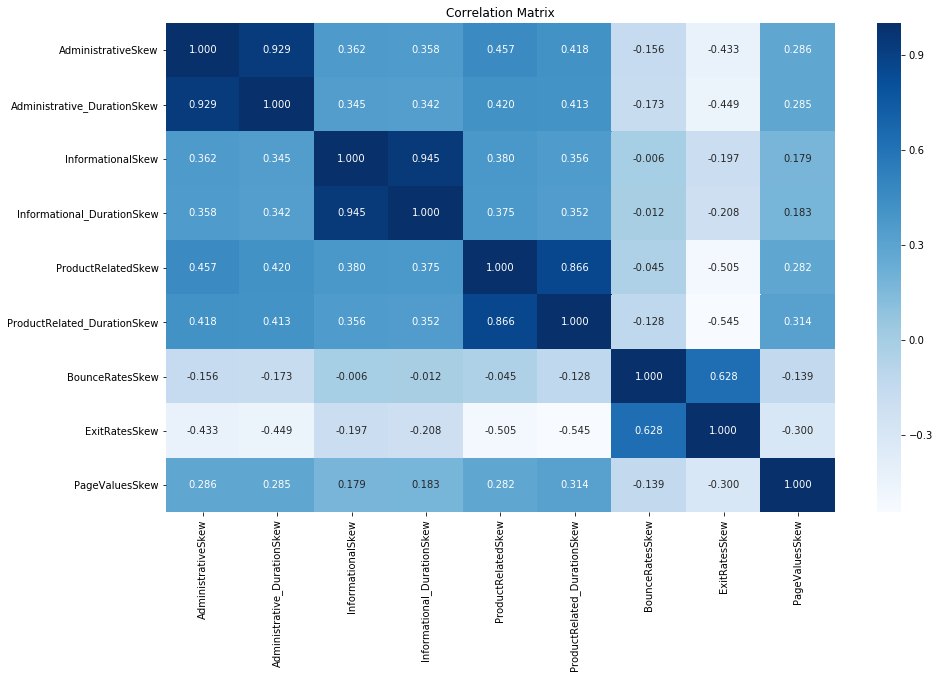

In [31]:
corr = data_cont_norm.corr()
fig, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(corr, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

__Final DataFrame__

- Connect all 3 dataframes back together and save them as a csv

In [32]:
pipeline3_2 = pd.concat([data_cont_norm,data_cat_enc,target_values], axis=1)
pipeline3_2.head()

,AdministrativeSkew,Administrative_DurationSkew,InformationalSkew,Informational_DurationSkew,ProductRelatedSkew,ProductRelated_DurationSkew,BounceRatesSkew,ExitRatesSkew,PageValuesSkew,SpecialDay_0.0,...,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,SeasonBins_1,SeasonBins_2,SeasonBins_3,SeasonBins_4,RevenueEnc
0,-0.0,-0.0,-0.0,-0.0,0.001399,-0.000000,0.339602,0.198950,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
1,-0.0,-0.0,-0.0,-0.0,0.002761,0.031306,-0.000000,0.177272,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
2,-0.0,-0.0,-0.0,-0.0,0.001399,-0.000000,0.339602,0.198950,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
3,-0.0,-0.0,-0.0,-0.0,0.002761,0.006454,0.314382,0.190387,-0.0,1,...,0,0,1,1,0,1,0,0,0,0
4,-0.0,-0.0,-0.0,-0.0,0.012429,0.089834,0.254789,0.136293,-0.0,1,...,0,0,1,0,1,1,0,0,0,0


In [33]:
pipeline3_2.to_csv('../project2-deadlinedemons/pipeline3_2.csv', index=0)